# EDA: Exploratory Data Analysis
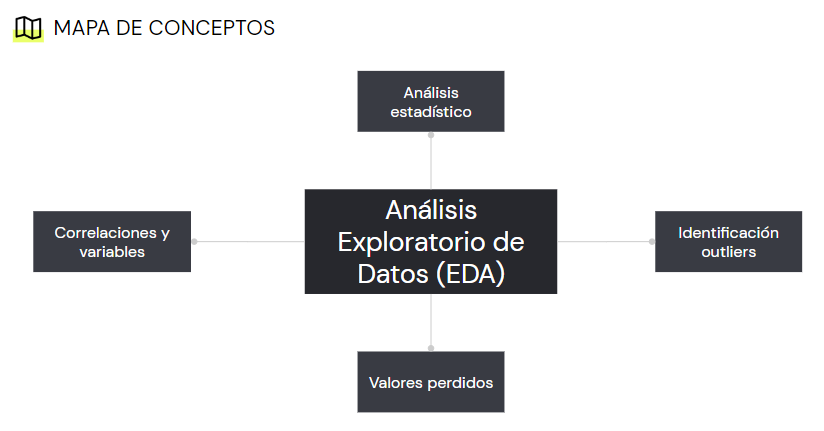

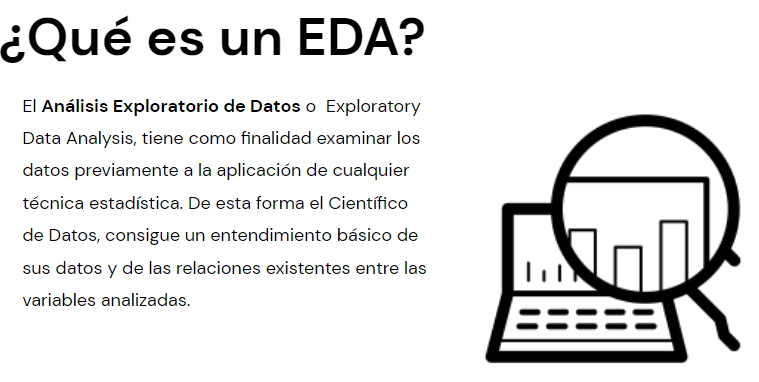

## Etapas del EDA
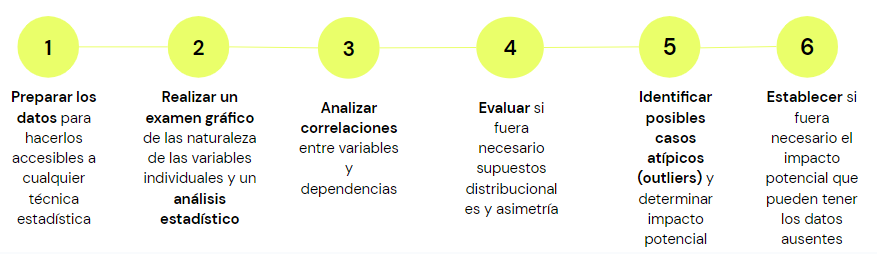

## Ejercicio de Acciones

1. Analizar las correlaciones de las acciones
2. Analizar si hay valores faltantes
3. Analizar la presencia de outliers

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Lectura del dataset
url = 'https://raw.githubusercontent.com/JJTorresDS/ds-data-sources/main/stocks.csv'
df = pd.read_csv(url, index_col='formatted_date', parse_dates=['formatted_date'])
df

,MCD,SBUX,GOOG,AMZN,MSFT,JPM,BAC,C,MAR,HLT,RCL,V,MA,PYPL
formatted_date,,,,,,,,,,,,,,
2016-01-01,106.332146,54.353962,742.950012,587.000000,49.853489,50.424938,12.573010,36.897804,57.754189,35.192841,74.235298,71.574371,85.822624,36.139999
2016-02-01,100.671043,52.064243,697.770020,552.520020,46.043667,48.033066,11.132540,33.707108,64.228912,41.061607,67.360649,69.556580,83.956566,38.139999
2016-03-01,108.782211,53.571442,744.950012,593.640015,50.339031,50.524323,12.021718,36.223217,67.336624,44.499886,74.790009,73.631477,91.278160,38.599998
2016-04-01,109.483307,50.457645,693.010010,659.590027,45.453705,53.919910,12.995729,40.153545,66.305466,43.716049,70.465584,74.363144,93.683258,39.180000
2016-05-01,105.648926,49.255203,735.719971,722.789978,48.306515,56.098225,13.201019,40.447887,62.474155,41.198154,70.456474,75.999847,92.817329,37.790001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-01,240.055786,120.441193,2704.419922,3327.590088,283.846313,150.006454,37.981613,66.635887,145.979996,131.449997,76.870003,245.622177,384.999420,275.529999
2021-08-01,234.863205,116.533272,2909.239990,3470.790039,300.752960,158.991928,41.338173,71.392593,135.139999,124.860001,82.730003,228.386063,345.793121,288.660004
2021-09-01,239.780670,109.836403,2665.310059,3285.040039,281.405182,162.709534,42.031269,69.675041,148.089996,132.110001,88.949997,222.358551,347.241272,260.209991


### 1. Analizar la correlación de variables

In [8]:
# Matriz de correlación
df.corr()

,MCD,SBUX,GOOG,AMZN,MSFT,JPM,BAC,C,MAR,HLT,RCL,V,MA,PYPL
MCD,1.000000,0.911649,0.872950,0.915207,0.921861,0.900587,0.857553,0.598726,0.758567,0.941815,0.052275,0.961073,0.956230,0.889973
SBUX,0.911649,1.000000,0.900343,0.874861,0.925871,0.854682,0.775915,0.463075,0.608303,0.895421,-0.138369,0.908692,0.907381,0.921438
GOOG,0.872950,0.900343,1.000000,0.898136,0.961937,0.909442,0.876196,0.530359,0.647768,0.905074,-0.130685,0.855338,0.841940,0.927271
AMZN,0.915207,0.874861,0.898136,1.000000,0.963040,0.831325,0.773567,0.414525,0.596446,0.859951,-0.207798,0.948422,0.951015,0.959953
MSFT,0.921861,0.925871,0.961937,0.963040,1.000000,0.873916,0.818282,0.436713,0.596887,0.897585,-0.232318,0.929751,0.926621,0.951394
JPM,0.900587,0.854682,0.909442,0.831325,0.873916,1.000000,0.982349,0.794576,0.872046,0.978772,0.202581,0.871820,0.859420,0.844586
BAC,0.857553,0.775915,0.876196,0.773567,0.818282,0.982349,1.000000,0.841762,0.899805,0.950060,0.292480,0.805341,0.789793,0.773794
C,0.598726,0.463075,0.530359,0.414525,0.436713,0.794576,0.841762,1.000000,0.913796,0.740547,0.686983,0.531859,0.510164,0.439464
MAR,0.758567,0.608303,0.647768,0.596446,0.596887,0.872046,0.899805,0.913796,1.000000,0.871625,0.581135,0.692143,0.679711,0.580950
HLT,0.941815,0.895421,0.905074,0.859951,0.897585,0.978772,0.950060,0.740547,0.871625,1.000000,0.170140,0.912165,0.905176,0.862439


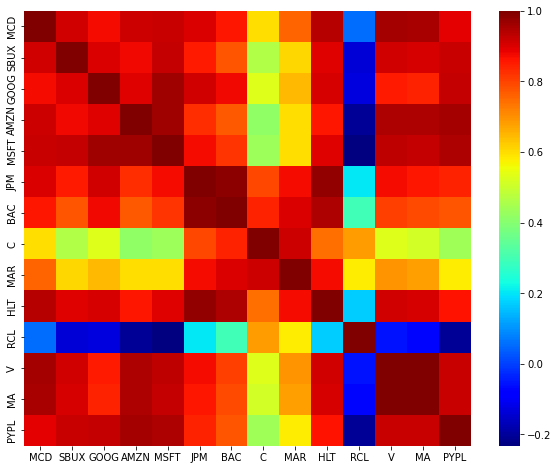

In [9]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='jet')
plt.show()

RCL: Relacionado de forma negativa \
C y MAR: Relacionados

### 2. Analizar si hay valores faltantes

In [11]:
# Verificación de valores faltantes
df.isnull().sum()

MCD     0
SBUX    0
GOOG    0
AMZN    0
MSFT    0
JPM     0
BAC     0
C       0
MAR     0
HLT     0
RCL     0
V       0
MA      0
PYPL    0
dtype: int64

Para este caso no tenemos problema con los valores faltantes

### 3. Analizar la presencia de outliers

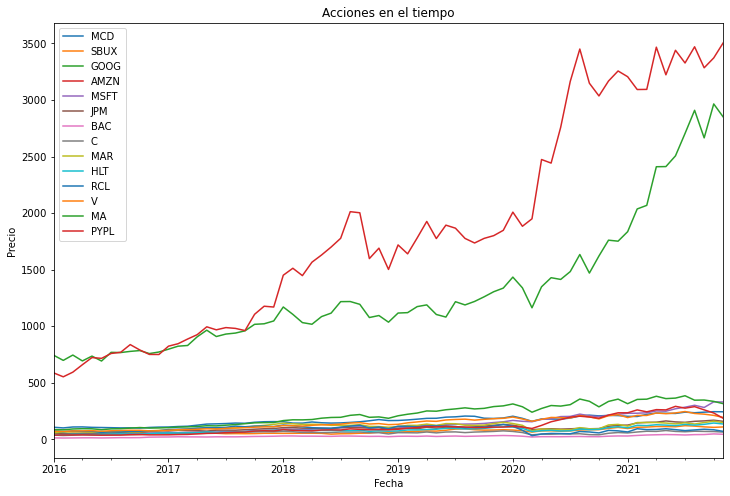

In [13]:
# Graficando la serie de tiempo
df.plot(kind='line', figsize=(12,8), xlabel='Fecha', ylabel='Precio', title='Acciones en el tiempo')
plt.show()

In [14]:
# Reestructurando la información
df_melt = pd.melt(df)
df_melt

,variable,value
0,MCD,106.332146
1,MCD,100.671043
2,MCD,108.782211
3,MCD,109.483307
4,MCD,105.648926
...,...,...
989,PYPL,275.529999
990,PYPL,288.660004
991,PYPL,260.209991
992,PYPL,232.589996


In [16]:
df_amzn = df_melt[df_melt['variable'] == 'AMZN']
df_amzn

,variable,value
213,AMZN,587.000000
214,AMZN,552.520020
215,AMZN,593.640015
216,AMZN,659.590027
217,AMZN,722.789978
...,...,...
279,AMZN,3327.590088
280,AMZN,3470.790039
281,AMZN,3285.040039
282,AMZN,3372.429932


In [18]:
# Asimetría
df_melt.skew()

C:\Users\alk10\AppData\Local\Temp\ipykernel_3556\2390166686.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_melt.skew()


value    3.264499
dtype: float64

In [19]:
# Curtosis
df_melt.kurtosis()

C:\Users\alk10\AppData\Local\Temp\ipykernel_3556\4187783432.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_melt.kurtosis()


value    11.030061
dtype: float64

<AxesSubplot:xlabel='value', ylabel='Count'>

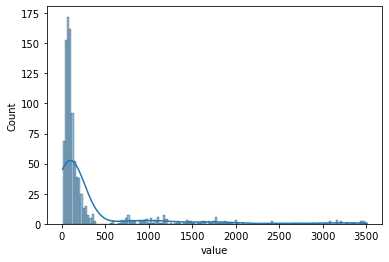

In [22]:
sns.histplot(data=df_melt, x='value', kde=True)

<AxesSubplot:xlabel='GOOG', ylabel='Count'>

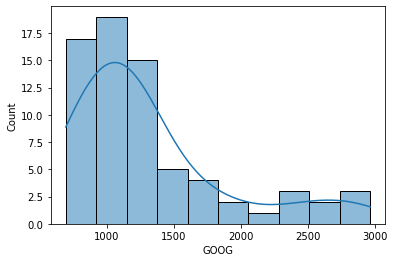

In [26]:
sns.histplot(data=df, x='GOOG', kde=True)

<AxesSubplot:xlabel='GOOG', ylabel='Count'>

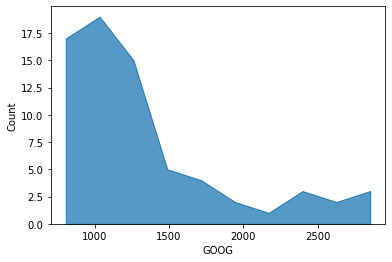

In [23]:
sns.histplot(data=df, x='GOOG', element='poly')

In [25]:
import numpy as np
df2 = df.copy()
df2['GOOG'] = np.log(df['GOOG'])

<AxesSubplot:xlabel='GOOG', ylabel='Count'>

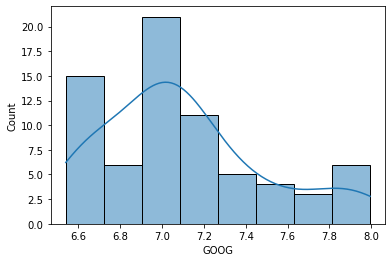

In [27]:
 sns.histplot(data=df2, x='GOOG', kde=True)

Encontrar outliers

<AxesSubplot:>

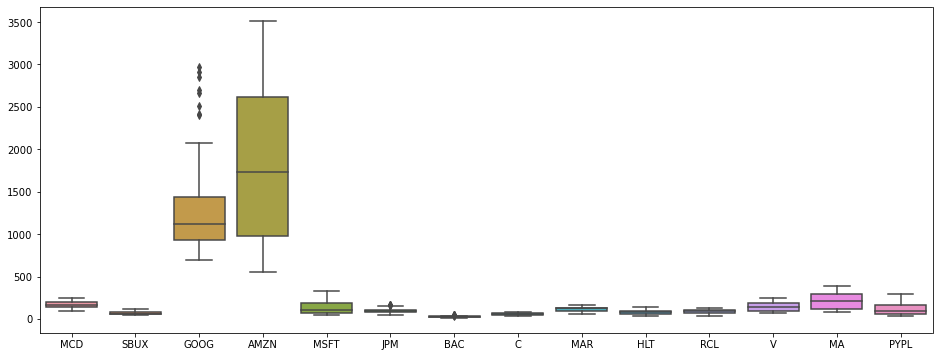

In [28]:
# Boxplot con atipicos
plt.figure(figsize=(16,6))
sns.boxplot(data=df)

<AxesSubplot:>

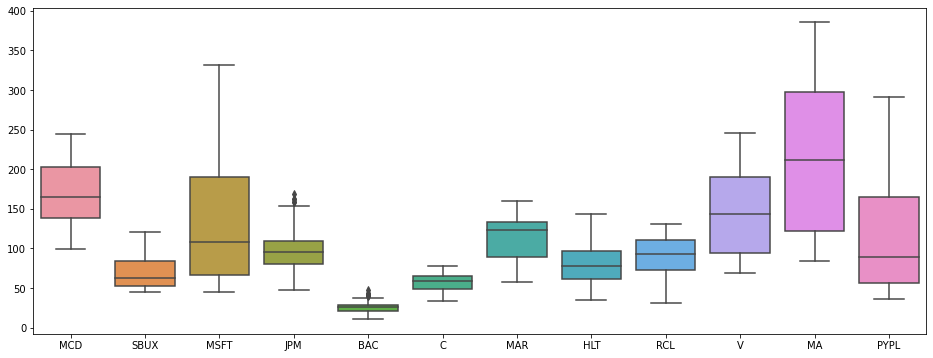

In [29]:
# Boxplot con atipicos
plt.figure(figsize=(16,6))
sns.boxplot(data=df.drop(['GOOG','AMZN'], axis=1))

<AxesSubplot:>

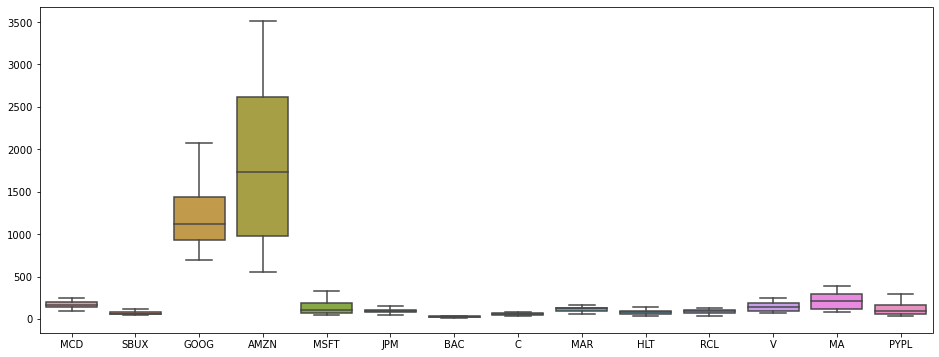

In [31]:
# Boxplot sin valores atipicos (outliers)
plt.figure(figsize=(16,6))
sns.boxplot(data=df, showfliers=False)

<AxesSubplot:>

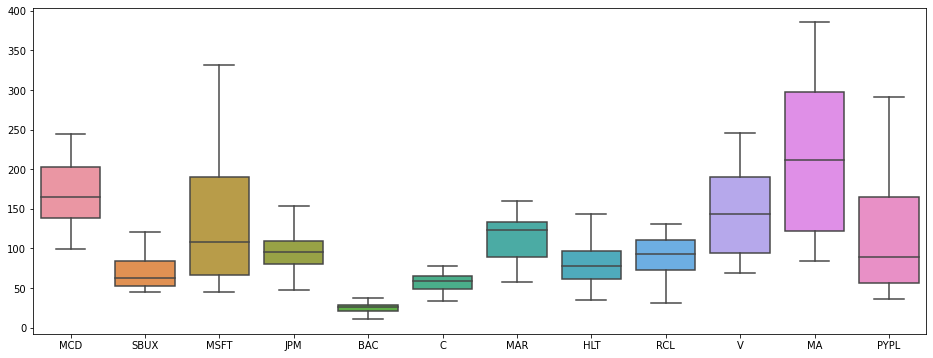

In [33]:
# Boxplot sin valores atipicos (outliers)
plt.figure(figsize=(16,6))
sns.boxplot(data=df.drop(['GOOG','AMZN'], axis=1), showfliers=False)

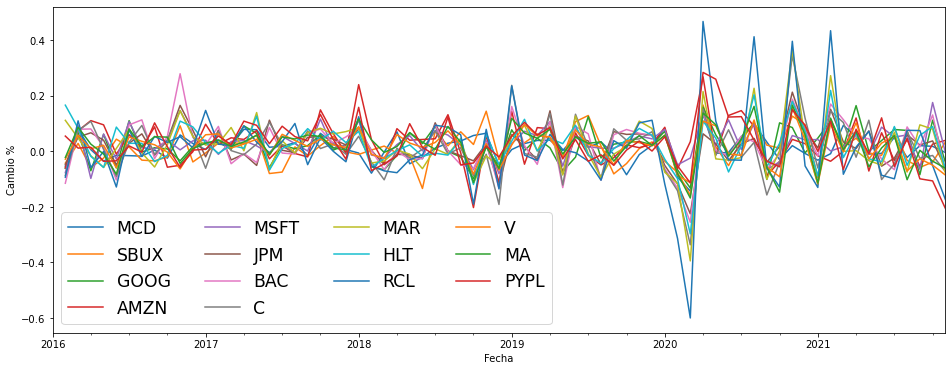

In [34]:
# Cambio porcentual
df.pct_change().plot(kind='line', figsize=(16,6),xlabel='Fecha',ylabel='Cambio %')
plt.legend(fontsize='xx-large', ncol=4, loc='lower left')

In [35]:
# Visualización del cambio porcentual
df.pct_change()

,MCD,SBUX,GOOG,AMZN,MSFT,JPM,BAC,C,MAR,HLT,RCL,V,MA,PYPL
formatted_date,,,,,,,,,,,,,,
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-01,-0.053240,-0.042126,-0.060812,-0.058739,-0.076420,-0.047434,-0.114568,-0.086474,0.112108,0.166760,-0.092606,-0.028192,-0.021743,0.055340
2016-03-01,0.080571,0.028949,0.067615,0.074423,0.093289,0.051865,0.079872,0.074646,0.048385,0.083735,0.110292,0.058584,0.087207,0.012061
2016-04-01,0.006445,-0.058124,-0.069723,0.111094,-0.097048,0.067207,0.081021,0.108503,-0.015313,-0.017614,-0.057821,0.009937,0.026349,0.015026
2016-05-01,-0.035023,-0.023831,0.061630,0.095817,0.062763,0.040399,0.015797,0.007330,-0.057783,-0.057597,-0.000129,0.022010,-0.009243,-0.035477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-01,0.050738,0.086039,0.079040,-0.032722,0.051717,-0.024174,-0.065693,-0.044240,0.069294,0.089786,-0.098616,0.053759,0.057109,-0.054721
2021-08-01,-0.021631,-0.032447,0.075735,0.043034,0.059563,0.059901,0.088373,0.071384,-0.074257,-0.050133,0.076233,-0.070173,-0.101835,0.047654
2021-09-01,0.020938,-0.057467,-0.083847,-0.053518,-0.064331,0.023382,0.016766,-0.024058,0.095827,0.058065,0.075184,-0.026392,0.004188,-0.098559


In [36]:
# Obteniendo la información de columnas más correlacionadas
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 10))

Top Absolute Correlations
V     MA      0.996748
JPM   BAC     0.982349
      HLT     0.978772
AMZN  MSFT    0.963040
GOOG  MSFT    0.961937
MCD   V       0.961073
AMZN  PYPL    0.959953
MCD   MA      0.956230
MSFT  PYPL    0.951394
AMZN  MA      0.951015
dtype: float64


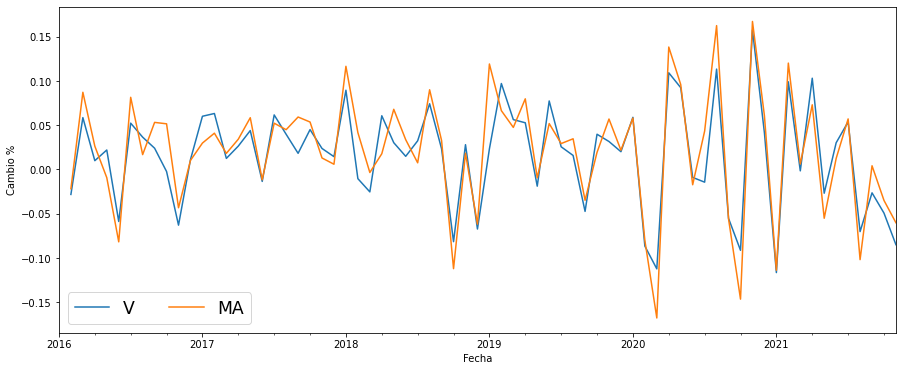

In [39]:
# Visualización de elementos con mayor correlación
df[["V", "MA"]].pct_change().plot(kind='line', figsize=(15,6),xlabel='Fecha',ylabel='Cambio %')
plt.legend(fontsize='xx-large', ncol=4, loc='lower left')

Necesitamos encontrar las variables mas significativas. \
No nos sirven las variables con correlación 0.

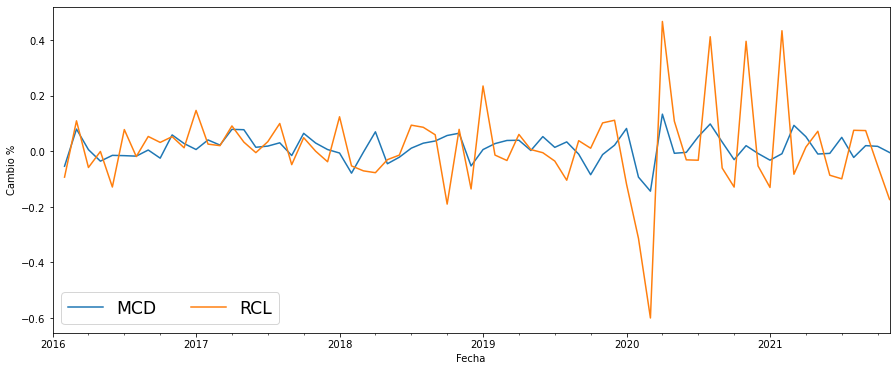

In [40]:
# Ejemplo sin correlacion
df[["MCD", "RCL"]].pct_change().plot(kind='line', figsize=(15,6),xlabel='Fecha',ylabel='Cambio %')
plt.legend(fontsize='xx-large', ncol=4, loc='lower left')